#  1. Data and probaility distrbutions

Let's assume you have some data(1D or univarinte for the meantime), lets call $X = {x^t}^N_{t=1}$, which is a N amount of 1D data. With $x^1$, being the first data point. We can say this data follows some density estimation or probaility distrubiton p(x). Lets assume that each $x^t$ is indepdent and identically disbtued(iid) sample. This proability distrubtion could be anything, but we can maybe assume some things. Lets work with some real data, i.e using the famous iris data and plot it.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import math

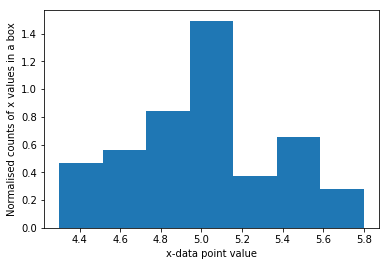

In [3]:
#import irsis datasets
iris = datasets.load_iris()
#only the first feature
X=iris.data[:, :1]
Y=iris.target
#only two plants
Y=Y[0:50]
X = X[0:50]

#plot normalised histogram plt irsis data
plt.hist(X[Y==0],bins='auto',normed=1)
plt.xlabel("x-data point value")
plt.ylabel("Normalised counts of x values in a box")
# plt.hist(X[Y==1],bins='auto',normed=1)

You can see we have imported some plant data and made a histogram which bins or counts how many points of patricular value of x fall within certain range of x values. I.e 0-1,1-2,etc. Looking at this first glance it seems like this data follows a Gaussian distrbution $N(\mu, \sigma^2)$:
\begin{align}
p(x) = \frac{1}{\sqrt{2\pi}\sigma}exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right)
\end{align}

where $E[X] = \mu$ is the mean and $Var(x)=\sigma^2$ is the variance or the root of the standard deviation. A quick search on google can tell you the formulas of Var and E. Assuming these formulas lets determine the variance and mean of the data and plot the gassuian.  

(array([ 0.46666667,  0.56      ,  0.84      ,  1.49333333,  0.37333333,
         0.65333333,  0.28      ]),
 array([ 4.3       ,  4.51428571,  4.72857143,  4.94285714,  5.15714286,
         5.37142857,  5.58571429,  5.8       ]),
 <a list of 7 Patch objects>)

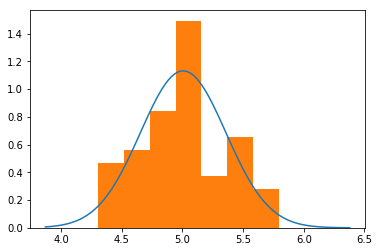

In [4]:
var = np.cov(X[Y==0],rowvar=False)
mu = np.mean(X[Y==0])
#Make linear space of x data points
x=np.linspace(min(X)*0.9,max(X)*1.1,100)
#Determine Gaussian from x
probx = 1/math.sqrt(2*np.pi*var)*np.exp(-(x-mu)**2/(2*var))
#plot
plt.plot(x,probx)
plt.hist(X[Y==0],bins='auto',normed=1)

Not too bad, I am sure if we had more data it would fit a lot nicer, I reference [Central Limit Theorm](https://en.wikipedia.org/wiki/Central_limit_theorem) here. 

Now the question is, how did we figure out the formulas for $E[X] = \mu$ is the mean and $Var(x)=\sigma^2$. Well we first assuming that that x are instances drawn from probaility density family, i.e  $x \sim p(x|\theta)$, where $\theta$ is some model parameter. This is also known as the liklehood, $l(\theta,X)$, as it is the probaility or likelehood of x given some model parameter $\theta$. So writing this out:

\begin{align}
l(\theta,X) = p(X|\theta) = \prod_{t=1}^N p(x^t|\theta) \ \ \text{(Assuming $x^t$ is indepdent) }
\end{align}

Assuming a indepdent $x^t$(i.e each x data point is not affect by other x data points) means that the total proability is just multiple of indepdent liklehoods. Thus if we find a $\theta$ which makes sampling $x^T$ from $P(x|\theta)$ as likely as possible then will find the Maximum liklehood estimation of $\theta$. So following on on our example if we assume that our model is a gaussian i.e $x^t \sim N(\mu, \sigma^2)$ we obtain:

\begin{align}
p(X|\mu,\sigma) = \frac{1}{(2\pi)^{N/2}\sigma^N}exp\left( \frac{-1}{2\sigma^2}\sum_t(x^t-\mu)^2 \right)
\end{align}

So by maximising $p(X|\mu,\sigma)$, we will get the most probable $\mu$ and $\sigma$ from our data. We can maximise easily by setting the dervative to zero. But first lets find the log likleyhood of everything to give us a simplier equation:

\begin{align}
log(p(X|\mu,\sigma)) = -\frac{N}{2}log(2\pi)-Nlog(\sigma) -\frac{1}{2\sigma^2}\sum_t(x^t-\mu)^2 
\end{align}

Finding the maximum for $\mu$:

\begin{align}
\frac{\partial}{\partial \mu }log(p(X|\mu,\sigma)) =  -\frac{1}{\sigma^2}\sum_t(x^t-\mu) \\ 
0 =  \sum_t(x^t)-\sum_t\mu) \\ 
\mu =  \frac{\sum_t(x^t)}{N} \\ 
\end{align}

And finding the maximum for $\sigma$:

\begin{align}
\frac{\partial}{\partial \sigma } log(p(X|\mu,\sigma)) = -\frac{N}{\sigma} +\frac{\sum_t(x^t-\mu)^2}{\sigma^3} \\
0 = -N +\frac{\sum_t(x^t-\mu)^2}{\sigma^2} \\
\sigma^2 = \frac{\sum_t(x^t-\mu)^2}{N} 
\end{align}

And there we have it. 


#  2. Classfication
So assuming some set of data follows some proability distrbution $C_0$, however what if we have some other set of data which follows some other proability distrbution $C_0$. Retreiving a new data point, we would like to know the which out of these 2 distrbutions this new data point falls into. I.e the posterior proability $p(C_i|x)$ which is the proability of being in class $C_i$, given some data point $x$. Using [Bayes Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) we obtain:
$$ p(C_i|x)= \frac{p(x|C_i)P(C_i)}{p(x)} =  \frac{p(x|C_i)P(C_i)}{\sum^K_{k=0} p(x|C_i)P(C_i)}$$

we can makine $p(x) = \sum^K_{k=0} p(x|C_i)P(C_i)$ using the [Law of total proability](https://en.wikipedia.org/wiki/Law_of_total_probability). This can be determined using liklehood function and the prior proability $P(C_i)$, which tells us the likely values that the classes may take before
looking at the sample data. For example might be more proabale to find people without cancer rather than people with cancer. The priors can also be seen as weight for each class, giving a weighted proability.

Now bring the iris data back for example, can assume that the data from each class follows some gaussian distbrituion i.e $p(x|C_i) = N(\mu, \sigma^2)$. We can determine $p(x|C_i)$ for each class using the maximum liklehoods we calculated previously. 

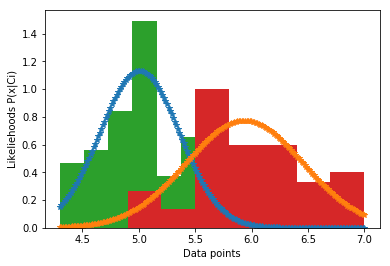

In [5]:
X=iris.data[:, :1]
Y=iris.target
#only two plants/classes
Y=Y[0:100]
X = X[0:100]
#new x data which is linearly spaced
x = np.linspace(np.min(X),np.max(X),200)

#Find the variances for each class
var1 = np.cov(X[Y==0],rowvar=False)
var2 = np.cov(X[Y==1],rowvar=False)

#Find the means for each class
m1 = np.mean(X[Y==0])
m2 = np.mean(X[Y==1])

#Given our model is gaussian distrbution
#can also do Log version for simpler equation
def gaussian(x, mean, cov):
  xm=np.reshape((x-mean), (-1, 1))
  px=1/np.sqrt(2*np.pi*cov)*np.exp(-xm**2/(2*cov))
  return px

#Determine maximum liklehoods for each class
#Assuming gaussian distrbution
#Given a set x
# I.e P(x|C1) and P(x|C2)=Gaussian
P1 = gaussian(x,m1,var1)
P2 = gaussian(x,m2,var2)

plt.plot(x,P1,'*')
plt.plot(x,P2,'*')

#plot normalised histogram plt irsis data
plt.hist(X[Y==0],bins='auto',normed=1)
plt.hist(X[Y==1],bins='auto',normed=1)
plt.xlabel("Data points")
plt.ylabel("Likeliehoods P(x|Ci)")

As you can see we determine the likehood of the linear spaced data x for each class. You can probaly also see from this graph that where the distrubtions cross over is also probaly where data point x switches from 1 class to another. This point is sometimes refered to as the discrimant. 

For this case we can assume that the prior proability $P(C_0)=P(C_1)=0.5$ are equal. But for a more general case we can assume that the proabilities $P(C_i)$ follow a Bernoulli distribution(Either event occurs or does not). The maximum liklehood of this distbrution can be estaimted to be 

$$ P(C_i) = \frac{\sum_t r^t_i}{N}$$
where t is each data point of a total of N data points and $r^t_i$ is 1 for corsponding classes $C_i$ and 0 for not corsponding classes. So for this case we had 50 $C_0$ and 50 $C_1$, so:

\begin{align}
P(C_0) = \frac{\sum_t r^t_0}{N} = \frac{50}{100} = 0.5\\
P(C_1) = \frac{\sum_t r^t_1}{N} = \frac{50}{100} = 0.5
\end{align}

Now to determine the posteriors, having same priors, the priors cancel out and we get a ratio of the likeliehoods.


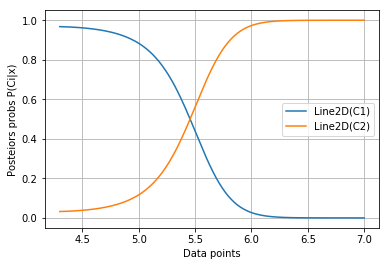

In [6]:
#Output the posteriors 
#i.e P(C1|x) and P(C2|x)
#P(C1|x) = P(C1|x)/(P(C1|x)+P(C2|x))
#Assuming priors of each class is same
#i.e P(C1)=P(C2)=0.5
c1, = plt.plot(x,P1/(P1+P2),label='C1')
c2, = plt.plot(x,P2/(P1+P2),label='C2')
plt.xlabel("Data points")
plt.ylabel("Posteiors probs P(Ci|x)")
plt.legend([c1,c2])
plt.grid()

As you can see when the data point x moves left to right it switches form class 1 to class 2 being more proable till its 100% certain that it's class 1 or 2. with the centre being the border from switching to class 1 to class 2.

#  3. Appendix and other python functions
You can also do the same thing as above but using difference packages. I will show you 3 different ways you can do the same above:
## 3.0 Scipy

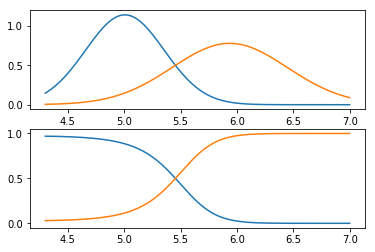

In [7]:
##Using scipy###
from scipy.stats import norm
#determine variance and mean
F1 = norm.fit(X[Y==0])
F2 = norm.fit(X[Y==1])
#Find likehoods P(x|Ci), using determined
#mean and variance
P1 = norm.pdf(x,loc = F1[0],scale = F1[1])
P2 = norm.pdf(x,loc = F2[0],scale = F2[1])

#plot liklehood and posteriors
plt.subplot(211)
plt.plot(x,P1)
plt.plot(x,P2)
plt.subplot(212)
#plot posteriors P(Ci|x)
plt.plot(x,P1/(P1+P2))
plt.plot(x,P2/(P1+P2))


## 3.1 sklearn
sklearn pretty much does everything for you

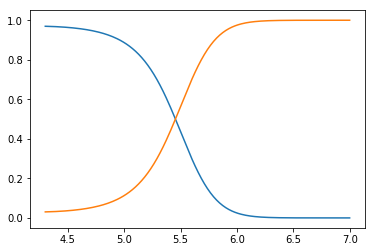

In [8]:
#Using sklearn package
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
#fit classes and data
gnb.fit(X, Y)
#Determine posteriors
#can also get likelehoods
prbs = gnb.predict_proba(x.reshape(-1,1))

#plot posteriors P(Ci|x)
plt.plot(x.reshape(-1,1),prbs[:,0])
plt.plot(x.reshape(-1,1),prbs[:,1])

## 3.2 Using scipy optimizer to do Maximum liklehood
Now this is doing it completely from scratch and letting computer handle everything, using the scipy optimizer, you can set it up to maximuize or minimze a function. In this case we would like to find the maximum liklehood function

In [21]:
#formuals for liklehood params
#Using scipy optomizer
from scipy.optimize import minimize

#Define function to optomize
def regressLL(params,X_I):
    # Resave the initial parameter guesses
    b0 = params[0]
    b1 = params[1]
    
    
    # Calculate the predicted values from the initial parameter guesses
    #i.e Assuming liklehood is gaussian
    Ypred = 1/(np.sqrt(2*np.pi)*b1)*np.exp(-(X_I-b0)**2/(2*b1**2))
    # Calculate the negative log-likelihood as the negative sum of the log of a normal
    # PDF 
    logLik = -np.sum(np.log(Ypred))

    # Tell the function to return the NLL (this is what will be minimized)
    #i.e minimlize the negative loglikehood
    return(logLik)

#Good init params just mean and std of data
initParams = [np.mean(X),np.std(X)]
# Run the minimizer
results = minimize(regressLL, initParams,X[Y==0], method='Nelder-Mead')
results2 = minimize(regressLL, initParams,X[Y==1], method='Nelder-Mead')


M1 = results.x[0]
VAR1 = results.x[1]
M2 = results2.x[0]
VAR2 = results2.x[1]

print("(Est mean1,actual mean1): ({},{})".format(M1,m1))
print("(Est var1,actual var1): ({},{})".format(VAR1**2,var1))

print("(Est mean2,actual mean2): ({},{})".format(M2,m2))
print("(Est var1,actual var1): ({},{})".format(VAR2**2,var2))

(Est mean1,actual mean1): (5.005961351796951,5.006)
(Est var1,actual var1): (0.12175875755018069,0.12424897959183676)
(Est mean2,actual mean2): (5.936054891280001,5.936)
(Est var1,actual var1): (0.26113109896094344,0.2664326530612245)
